In [10]:
import networkx as nx

G = nx.read_gml("collab_detections_graph.gml")

# Example: print all nodes with attributes
for node in G.nodes(data=True):
    print(node)



('UCm1LjO7mpzb68Q71PjGleWQ', {'cluster': '1621', 'network': 'None'})
('UCq6VFHwMzcMXbuKyG7SQYIg', {'cluster': ['220', '11097'], 'network': 'Maker_Studios'})
('UCJ3_30nK_biup2t7g_3C61g', {'cluster': '', 'network': 'BroadbandTV'})
('UCc_JXQMtWfJmQk3XPQ8JVJQ', {'cluster': '4294', 'network': 'None'})
('UCtBFqR-itrGB4C566GkfrTA', {'cluster': '5839', 'network': 'BroadbandTV'})
('UC3Nr-TlH0dQD-R7JBdWU00w', {'cluster': '1369', 'network': 'None'})
('UCutBTW0UzX-nCXSaZOM1R2w', {'cluster': ['6028', '10773'], 'network': 'Curse'})
('UClpEE-Led9ZK0GJQKvU--3Q', {'cluster': ['5556', '5884', '7050'], 'network': 'Maker_Studios'})
('UCZApDB9BW7ZjNcPb3Wu7rRg', {'cluster': ['7896', '8755', '9958', '10681'], 'network': 'None'})
('UCMDz09-3zO1hm1pqRA-Er0A', {'cluster': '6135', 'network': 'BroadbandTV'})
('UCV1JuyDF9Re3HyXFGeqnC7Q', {'cluster': ['1119', '2540'], 'network': 'Studio71'})
('UCGrs4qEyhPEavGBHNdDi26A', {'cluster': ['13074', '13077'], 'network': 'BroadbandTV'})
('UC_GIy4IHw-LShuhcjJ6n9jg', {'cluste

In [11]:
# Example: get all edges with collaboration video info
for u, v, data in G.edges(data=True):
    print(f"{u} - {v}: {data['weight']} videos, video IDs: {data.get('videos')}")


UCq6VFHwMzcMXbuKyG7SQYIg - UCmA-0j6DRVQWo4skl8Otkiw: 1 videos, video IDs: khyg5YJlLPI
UCq6VFHwMzcMXbuKyG7SQYIg - UCCYHZKyLdUnT7BsGfCQgQ-Q: 1 videos, video IDs: qP8HTuEu7BY
UClpEE-Led9ZK0GJQKvU--3Q - UCIKF1msqN7lW9gplsifOPkQ: 1 videos, video IDs: On4GE5hAU8s
UClpEE-Led9ZK0GJQKvU--3Q - UCcLLDqqgjHoFaNkNdIrf_FA: 1 videos, video IDs: hAvpa3iyrsM
UClpEE-Led9ZK0GJQKvU--3Q - UC3M4u8_WwqY-2xDbJXxo5eQ: 2 videos, video IDs: ['4cEkXTIcvH4', '_kOwJy1fOuQ']
UCZApDB9BW7ZjNcPb3Wu7rRg - UCU1nH5X8eC0aD3PkveRjjgw: 1 videos, video IDs: WvCaYRRL9F8
UCMDz09-3zO1hm1pqRA-Er0A - UC3fxB7rF6T7wqymKUJxwmXA: 1 videos, video IDs: C7Waq5ZgqGU
UC_GIy4IHw-LShuhcjJ6n9jg - UCE6yrKCbfZ-C-8Sbl1LoYhg: 1 videos, video IDs: VNXJbRvu8zE
UC_GIy4IHw-LShuhcjJ6n9jg - UC5l6twzfConuZFkGA_GYrtw: 4 videos, video IDs: ['2LAQMtZKpw8', 'KxWE0NJ96eg', 'hnbtt8DTrXI', 'pz8DhJZxbhQ']
UCUcBFGAfOzut1x4GSWa6Akg - UCCk_JV7ar8HlxWZRXQKgS7w: 1 videos, video IDs: RJir4ghyTDo
UCi7TVXyvrIwqeS9tfYD8UDA - UCvGiJYBPgVP7W1ypE3DKOqA: 1 videos, video IDs

In [12]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 3625
Number of edges: 3475


In [13]:
node_clusters = []

for _, data in G.nodes(data=True):
    cluster = data.get('cluster')
    # Convert lists to string, leave strings/numbers unchanged
    if isinstance(cluster, list):
        cluster = ','.join(map(str, cluster))  # or just cluster[0] if it’s always 1 element
    node_clusters.append(cluster)

unique_node_clusters = set(node_clusters)
print("Unique node clusters:", len(unique_node_clusters))


Unique node clusters: 3221


In [14]:
edge_clusters = [data['cluster'] for _, _, data in G.edges(data=True)]
unique_edge_clusters = set(edge_clusters)
print("Unique edge clusters:", len(unique_edge_clusters))


Unique edge clusters: 1924


In [15]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

max_in = max(in_degrees.items(), key=lambda x: x[1])
max_out = max(out_degrees.items(), key=lambda x: x[1])
print("Max in-degree:", max_in)
print("Max out-degree:", max_out)


Max in-degree: ('UC0v-tlzsn0QZwJnkiaUSJVQ', 23)
Max out-degree: ('UC-Tvz0FJd6xRvVDw_4dc_GQ', 62)


In [16]:
from collections import Counter
weights = [data['weight'] for _, _, data in G.edges(data=True)]
weight_count = Counter(weights)
print("Weight distribution (collab frequency):")
for w, c in sorted(weight_count.items()):
    print(f"  Weight {w}: {c} edges")


Weight distribution (collab frequency):
  Weight 1: 2506 edges
  Weight 2: 414 edges
  Weight 3: 165 edges
  Weight 4: 102 edges
  Weight 5: 56 edges
  Weight 6: 37 edges
  Weight 7: 38 edges
  Weight 8: 31 edges
  Weight 9: 22 edges
  Weight 10: 12 edges
  Weight 11: 12 edges
  Weight 12: 11 edges
  Weight 13: 12 edges
  Weight 14: 5 edges
  Weight 15: 3 edges
  Weight 16: 7 edges
  Weight 17: 4 edges
  Weight 18: 1 edges
  Weight 19: 4 edges
  Weight 20: 5 edges
  Weight 21: 4 edges
  Weight 24: 1 edges
  Weight 25: 2 edges
  Weight 26: 1 edges
  Weight 27: 1 edges
  Weight 28: 2 edges
  Weight 29: 2 edges
  Weight 32: 2 edges
  Weight 33: 1 edges
  Weight 36: 1 edges
  Weight 40: 1 edges
  Weight 41: 1 edges
  Weight 42: 1 edges
  Weight 48: 1 edges
  Weight 49: 2 edges
  Weight 51: 1 edges
  Weight 74: 1 edges
  Weight 77: 1 edges
  Weight 88: 1 edges
  Weight 117: 1 edges


In [17]:
networks = [data.get('network', 'Unknown') for _, data in G.nodes(data=True)]
network_count = Counter(networks)
print("Networks distribution:")
for net, c in network_count.items():
    print(f"  {net}: {c} channels")


Networks distribution:
  None: 913 channels
  Maker_Studios: 385 channels
  BroadbandTV: 852 channels
  Curse: 60 channels
  Studio71: 306 channels
  true icontent affiliate: 3 channels
  LifeTube: 2 channels
  Machinima: 69 channels
  OmniaMediaCo: 35 channels
  Divimove IT affiliated: 3 channels
  alldefdigital: 1 channels
  Maker Studios: 100 channels
  StyleHaul: 65 channels
  IDG Germany: 5 channels
  UCI Affiliate: 7 channels
  vivacommunications: 1 channels
  Fullscreen: 159 channels
  digitsshow: 1 channels
  OutdoorHub: 3 channels
  PING Managed: 1 channels
  Maze DK: 1 channels
  M6 wizdeo: 2 channels
  ScaleLab: 43 channels
  Mixicom: 9 channels
  Zoomin TV: 13 channels
  Toms Hardware: 7 channels
  WhistleSportsFitness: 2 channels
  TopBeautyBlog: 16 channels
  Freedom!: 49 channels
  AIR: 15 channels
  GamingClerks: 1 channels
  Citizine Affiliate: 3 channels
  Mitu: 14 channels
  Creative Nation: 3 channels
  DigiSayLimited Managed: 1 channels
  melberries: 4 channels
  Q

## Visualization

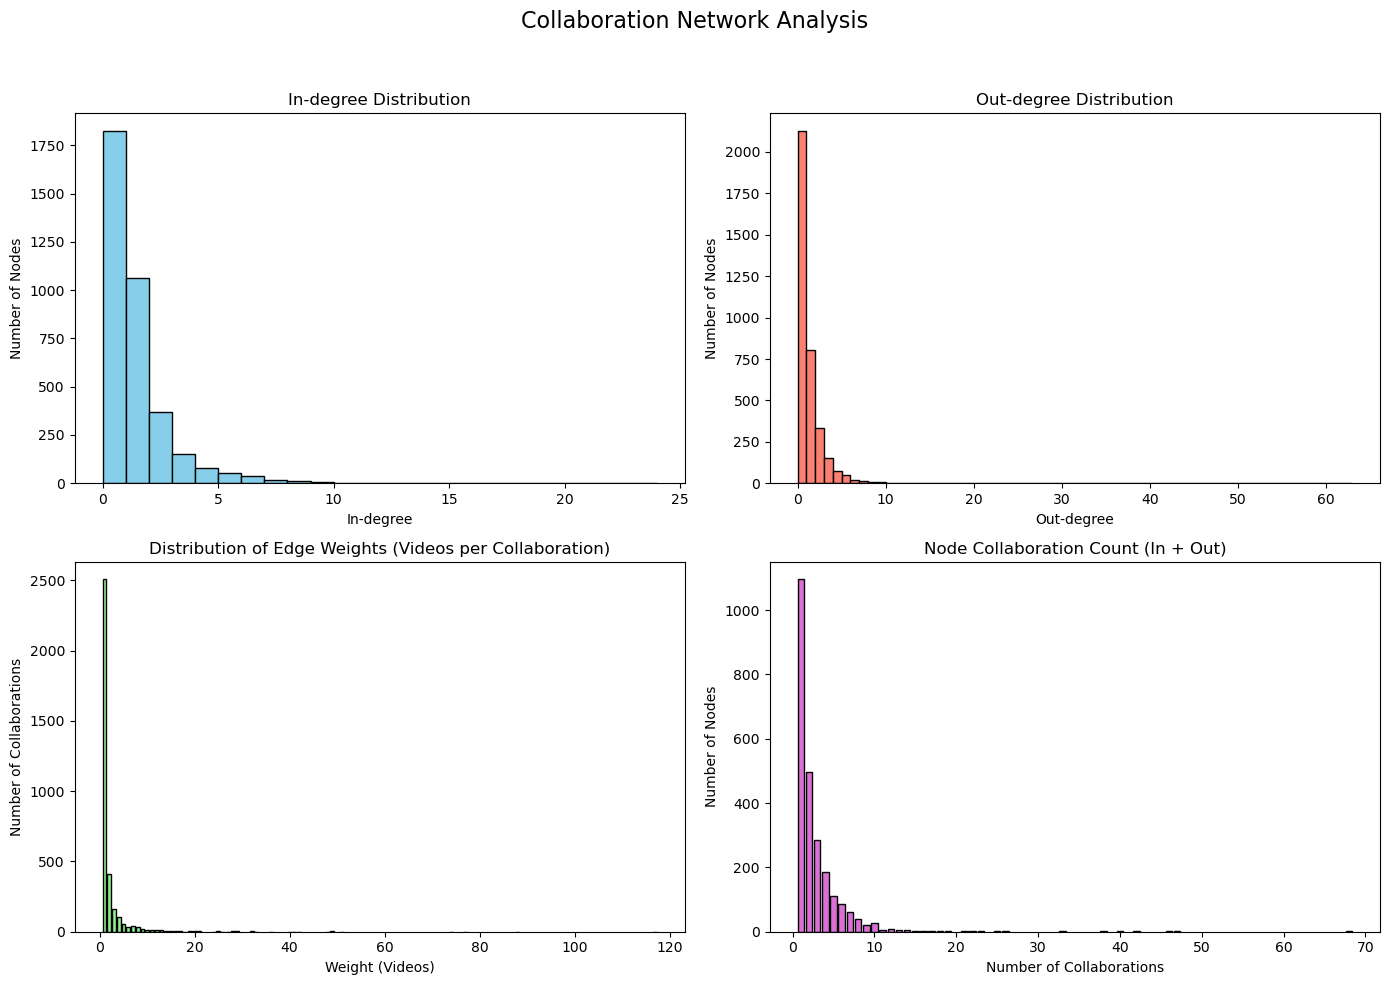

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Load graph
G = nx.read_gml("collab_detections_graph.gml")  # Update path if needed

# Degree distributions
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

in_values = list(in_degrees.values())
out_values = list(out_degrees.values())

# Edge weight distribution (videos per collaboration)
weights = [data['weight'] for _, _, data in G.edges(data=True)]
weight_count = Counter(weights)

# Total collaborations per node (in + out)
collab_counts = Counter(in_degrees) + Counter(out_degrees)
collab_freq = Counter(collab_counts.values())

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Collaboration Network Analysis", fontsize=16)

# In-degree
axs[0, 0].hist(in_values, bins=range(max(in_values) + 2), color='skyblue', edgecolor='black')
axs[0, 0].set_title("In-degree Distribution")
axs[0, 0].set_xlabel("In-degree")
axs[0, 0].set_ylabel("Number of Nodes")

# Out-degree
axs[0, 1].hist(out_values, bins=range(max(out_values) + 2), color='salmon', edgecolor='black')
axs[0, 1].set_title("Out-degree Distribution")
axs[0, 1].set_xlabel("Out-degree")
axs[0, 1].set_ylabel("Number of Nodes")

# Edge weight
axs[1, 0].bar(weight_count.keys(), weight_count.values(), color='lightgreen', edgecolor='black')
axs[1, 0].set_title("Distribution of Edge Weights (Videos per Collaboration)")
axs[1, 0].set_xlabel("Weight (Videos)")
axs[1, 0].set_ylabel("Number of Collaborations")

# Node collab frequency
axs[1, 1].bar(collab_freq.keys(), collab_freq.values(), color='orchid', edgecolor='black')
axs[1, 1].set_title("Node Collaboration Count (In + Out)")
axs[1, 1].set_xlabel("Number of Collaborations")
axs[1, 1].set_ylabel("Number of Nodes")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [18]:
import pandas as pd
import ast  # for safely parsing list-like strings

# Load the file
df = pd.read_csv("df_collabs.txt", sep="\t")
list_columns = ['from_cluster', 'to_cluster', 'videos']

for col in list_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Show first few rows
print(df.head())


   Unnamed: 0  cluster                      from  from_category  \
0           0      220  UCq6VFHwMzcMXbuKyG7SQYIg         Gaming   
1           1    11097  UCq6VFHwMzcMXbuKyG7SQYIg         Gaming   
2           2     5556  UClpEE-Led9ZK0GJQKvU--3Q  Entertainment   
3           3     5556  UClpEE-Led9ZK0GJQKvU--3Q  Entertainment   
4           4     5556  UClpEE-Led9ZK0GJQKvU--3Q  Entertainment   

         from_cluster   from_network  from_popularity   from_topic  \
0        [220, 11097]  Maker Studios                4  Action game   
1        [220, 11097]  Maker Studios                4  Action game   
2  [5556, 5884, 7050]  Maker Studios                2     Football   
3  [5556, 5884, 7050]  Maker Studios                2     Football   
4  [5556, 5884, 7050]  Maker Studios                2     Football   

                         to    to_category                        to_cluster  \
0  UCmA-0j6DRVQWo4skl8Otkiw  Entertainment          [2251, 2981, 2982, 7678]   
1  UCCYHZKyLdUnT

In [19]:
print("Total collaborations (rows):", len(df))
# just equal to the number of edges in the gml file yayyyyyyy

Total collaborations (rows): 3475


In [20]:
print(df['from'].value_counts().head())
print(df['to'].value_counts().head())
# Max in and out degree also same means nodes are also same phewwww

from
UC-Tvz0FJd6xRvVDw_4dc_GQ    62
UCbTRgghKvt-I_V8CUtCPyrA    46
UCAcziR0Lap_NIgQcwH7G29A    41
UCzIzWHfn7wsS_VK0vQHV8Ew    41
UCZjCiuXIP9ydZ4E6lxq1rIw    41
Name: count, dtype: int64
to
UC0v-tlzsn0QZwJnkiaUSJVQ    23
UCcaEEvsR9Q-ucWPHfOLacxg    17
UCplwPnjH1AAB1He_7rMkHgQ    14
UC4rZhOlpnq4TpSj6DiWfuNQ    13
UCtRDjvmnxgv6nNL6h696UYg    13
Name: count, dtype: int64


In [21]:
pop_pairs = df[['from_popularity', 'to_popularity']].dropna()
pop_pairs['pair'] = list(zip(pop_pairs['from_popularity'], pop_pairs['to_popularity']))

# Unique pairs and their counts
pop_counts = pop_pairs['pair'].value_counts()
print("Unique popularity pairs:", len(pop_counts))
print(pop_counts)


Unique popularity pairs: 39
pair
(3, 3)    781
(2, 3)    381
(3, 2)    372
(4, 3)    294
(2, 2)    263
(3, 4)    252
(4, 4)    166
(1, 3)    126
(4, 2)    111
(2, 4)    100
(3, 1)     88
(1, 2)     80
(2, 1)     62
(0, 2)     52
(0, 3)     47
(1, 1)     42
(0, 1)     32
(1, 4)     30
(3, 0)     26
(2, 0)     26
(4, 1)     22
(4, 5)     20
(0, 0)     18
(1, 0)     17
(0, 4)     16
(3, 5)     11
(5, 3)     10
(5, 4)      7
(5, 2)      4
(2, 5)      3
(1, 5)      3
(6, 3)      3
(4, 0)      2
(4, 6)      2
(5, 1)      2
(6, 2)      1
(3, 6)      1
(6, 1)      1
(2, 6)      1
Name: count, dtype: int64


In [22]:
topic_pairs = df[['from_topic', 'to_topic']].dropna()
topic_pairs['pair'] = list(zip(topic_pairs['from_topic'], topic_pairs['to_topic']))

topic_counts = topic_pairs['pair'].value_counts()
print("Unique topic pairs:", len(topic_counts))
print(topic_counts)


Unique topic pairs: 360
pair
(Gaming, Gaming)                            226
(Lifestyle, Lifestyle)                      183
(Music, Music)                              163
(Action game, Action game)                  157
(Hobby, Hobby)                              144
                                           ... 
(Electronic music, Music)                     1
(Humor, Lifestyle)                            1
(Hip hop music, Fitness)                      1
(Hobby, Fashion)                              1
(Hip hop music, Role-playing video game)      1
Name: count, Length: 360, dtype: int64


In [23]:
def is_intra(row):
    return row['from_category'] == row['to_category']

df['intra_category'] = df.apply(is_intra, axis=1)

intra_count = df['intra_category'].value_counts()
print("Intra vs Inter-category collaborations:")
print(intra_count)  # True = Intra, False = Inter


Intra vs Inter-category collaborations:
intra_category
False    1771
True     1704
Name: count, dtype: int64


In [24]:
# Top weighted collaborations
top_collabs = df.sort_values(by='weight', ascending=False).head(10)

# Add comparison flags
top_collabs['intra_category'] = top_collabs['from_category'] == top_collabs['to_category']
top_collabs['intra_topic'] = top_collabs['from_topic'] == top_collabs['to_topic']

print(top_collabs[['from', 'to', 'weight', 'from_category', 'to_category', 'intra_category', 'from_topic', 'to_topic', 'intra_topic']])


                          from                        to  weight  \
1276  UC-NINtNMPM75eaqh07RCy_Q  UCIZSqPHF-R9m3X5o0VPKFdg     117   
2585  UCHA_Ac7zHPCxQi3ZBbkBLvA  UCpTgltu3Ap618ySFFdWaHjg      88   
1354  UCdOWyp25T0HDtjpnV2LpIyw  UCQJT7rpynlR7SSdn3OyuI_Q      77   
2714  UCQJT7rpynlR7SSdn3OyuI_Q  UCdOWyp25T0HDtjpnV2LpIyw      74   
2454  UCoKGanMmrKj8RAqAwS5vRug  UCBINYCmwE29fBXCpUI8DgTA      51   
2595  UCz_BJGTYrM4ntr7vsrsjfLw  UCcsja3nlq2R1belenHR0j0Q      49   
1105  UCzpCc5n9hqiVC7HhPwcIKEg  UC4PooiX37Pld1T8J5SYT-SQ      49   
2596  UCz_BJGTYrM4ntr7vsrsjfLw  UCU4BHh9Dwfd7-I_xTZ5037Q      48   
897   UC4PooiX37Pld1T8J5SYT-SQ  UCzpCc5n9hqiVC7HhPwcIKEg      42   
38    UCyeVfsThIHM_mEZq7YXIQSQ  UCYVinkwSX7szARULgYpvhLw      41   

       from_category     to_category  intra_category               from_topic  \
1276       Education   Entertainment           False                Lifestyle   
2585          Gaming  People & Blogs           False                   Gaming   
1354    

## Visualization

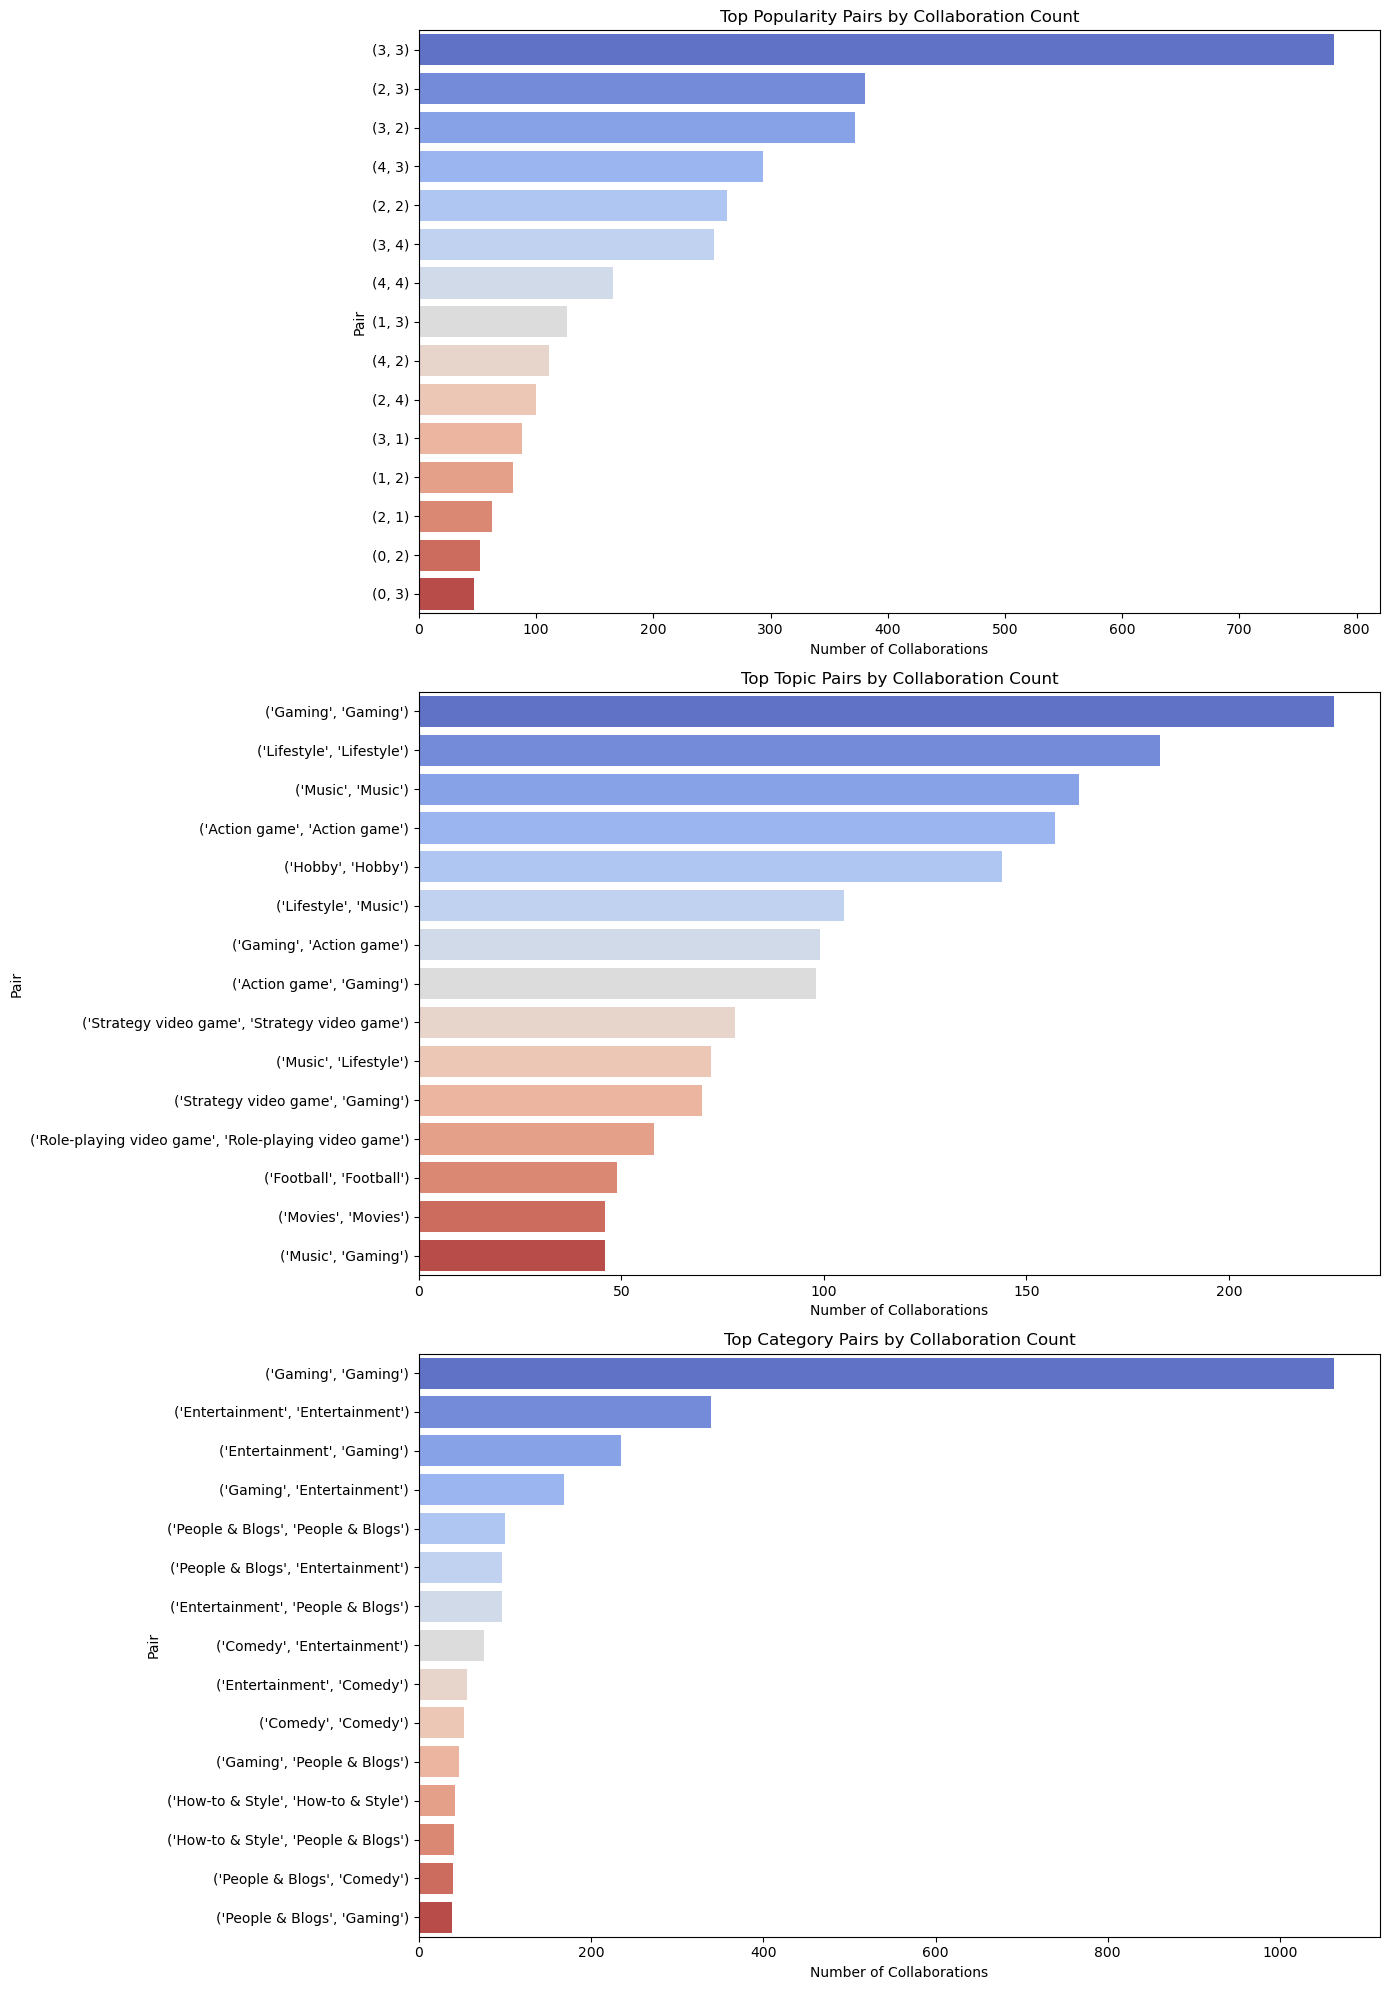

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load and parse
df = pd.read_csv("df_collabs.txt", sep="\t")
list_columns = ['from_cluster', 'to_cluster', 'videos']
for col in list_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Prepare pairs and counts
def get_pair_counts(df, col1, col2):
    pair_df = df[[col1, col2]].dropna()
    pair_df['pair'] = list(zip(pair_df[col1], pair_df[col2]))
    counts = pair_df['pair'].value_counts().reset_index()
    counts.columns = ['pair', 'count']
    return counts[counts['count'] > 0]  # remove zero counts

pop_counts = get_pair_counts(df, 'from_popularity', 'to_popularity')
topic_counts = get_pair_counts(df, 'from_topic', 'to_topic')
category_counts = get_pair_counts(df, 'from_category', 'to_category')

# Plotting function
def plot_top_pairs(data, title, ax):
    top_data = data.head(15)
    sns.barplot(x='count', y=top_data['pair'].astype(str), data=top_data, ax=ax, palette="coolwarm")
    ax.set_title(title)
    ax.set_xlabel("Number of Collaborations")
    ax.set_ylabel("Pair")

# Plot
fig, axs = plt.subplots(3, 1, figsize=(14, 20))
plot_top_pairs(pop_counts, "Top Popularity Pairs by Collaboration Count", axs[0])
plot_top_pairs(topic_counts, "Top Topic Pairs by Collaboration Count", axs[1])
plot_top_pairs(category_counts, "Top Category Pairs by Collaboration Count", axs[2])

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

lang_df = pd.read_csv("df_channel_languages.csv")  # replace with your real filename
lang_map = dict(zip(lang_df['id'], lang_df['lang']))
for node in G.nodes:
    G.nodes[node]['lang'] = lang_map.get(node, 'unknown')


In [5]:
intra_lang = 0
inter_lang = 0

for u, v in G.edges():
    lang_u = G.nodes[u].get('lang')
    lang_v = G.nodes[v].get('lang')
    if lang_u == lang_v:
        intra_lang += 1
    else:
        inter_lang += 1

print(f"Intra-language collaborations: {intra_lang}")
print(f"Inter-language collaborations: {inter_lang}")


Intra-language collaborations: 1782
Inter-language collaborations: 1693


In [6]:
from collections import Counter
lang_dist = Counter(nx.get_node_attributes(G, 'lang').values())
print(lang_dist)


Counter({'en': 1832, 'pt': 748, 'es': 262, nan: 167, 'de': 151, 'ru': 138, 'fr': 137, 'it': 36, 'ar': 20, 'hr': 14, 'th': 12, 'pl': 12, 'ro': 11, 'tr': 11, 'no': 10, 'bg': 8, 'da': 7, 'et': 7, 'id': 7, 'ca': 4, 'vi': 4, 'tl': 3, 'ko': 3, 'ja': 3, 'af': 2, 'cs': 2, 'nl': 2, 'cy': 2, 'sv': 2, 'sw': 2, 'uk': 2, 'sl': 1, 'so': 1, 'zh-tw': 1, 'el': 1})


In [7]:
lang_pair_counts = {}

for u, v in G.edges():
    lang_u = G.nodes[u].get('lang')
    lang_v = G.nodes[v].get('lang')
    
    if not lang_u or not lang_v or pd.isna(lang_u) or pd.isna(lang_v):
        continue  # Skip incomplete data

    pair = tuple(sorted([lang_u, lang_v]))
    lang_pair_counts[pair] = lang_pair_counts.get(pair, 0) + 1

top_lang_pairs = sorted(lang_pair_counts.items(), key=lambda x: -x[1])
print("Top language-language collaboration pairs:")
for pair, count in top_lang_pairs:
    print(f"{pair[0]} - {pair[1]}: {count} collaborations")


Top language-language collaboration pairs:
en - en: 1178 collaborations
en - pt: 335 collaborations
pt - pt: 316 collaborations
en - es: 224 collaborations
en - ru: 114 collaborations
en - fr: 95 collaborations
es - es: 84 collaborations
fr - pt: 74 collaborations
es - pt: 69 collaborations
de - en: 69 collaborations
de - de: 66 collaborations
fr - fr: 62 collaborations
de - pt: 34 collaborations
ru - ru: 30 collaborations
en - it: 29 collaborations
pt - ru: 27 collaborations
en - tr: 21 collaborations
es - fr: 20 collaborations
it - pt: 18 collaborations
es - ru: 18 collaborations
es - it: 18 collaborations
de - es: 17 collaborations
it - it: 16 collaborations
en - no: 15 collaborations
fr - ru: 13 collaborations
en - th: 12 collaborations
de - fr: 12 collaborations
en - sw: 11 collaborations
en - et: 10 collaborations
pt - tr: 10 collaborations
en - id: 9 collaborations
en - ro: 9 collaborations
fr - it: 9 collaborations
de - ru: 8 collaborations
th - th: 8 collaborations
de - it: 8 

In [8]:

# Display basic info
print(df.columns)
print(df[['from', 'from_category', 'to', 'to_category']].head())


Index(['Unnamed: 0', 'cluster', 'from', 'from_category', 'from_cluster',
       'from_network', 'from_popularity', 'from_topic', 'to', 'to_category',
       'to_cluster', 'to_network', 'to_popularity', 'to_topic', 'videos',
       'weight'],
      dtype='object')
                       from  from_category                        to  \
0  UCq6VFHwMzcMXbuKyG7SQYIg         Gaming  UCmA-0j6DRVQWo4skl8Otkiw   
1  UCq6VFHwMzcMXbuKyG7SQYIg         Gaming  UCCYHZKyLdUnT7BsGfCQgQ-Q   
2  UClpEE-Led9ZK0GJQKvU--3Q  Entertainment  UCIKF1msqN7lW9gplsifOPkQ   
3  UClpEE-Led9ZK0GJQKvU--3Q  Entertainment  UCcLLDqqgjHoFaNkNdIrf_FA   
4  UClpEE-Led9ZK0GJQKvU--3Q  Entertainment  UC3M4u8_WwqY-2xDbJXxo5eQ   

     to_category  
0  Entertainment  
1  Entertainment  
2  Entertainment  
3         Gaming  
4         Gaming  


In [9]:
df['from_lang'] = df['from'].map(lang_map)
df['to_lang'] = df['to'].map(lang_map)


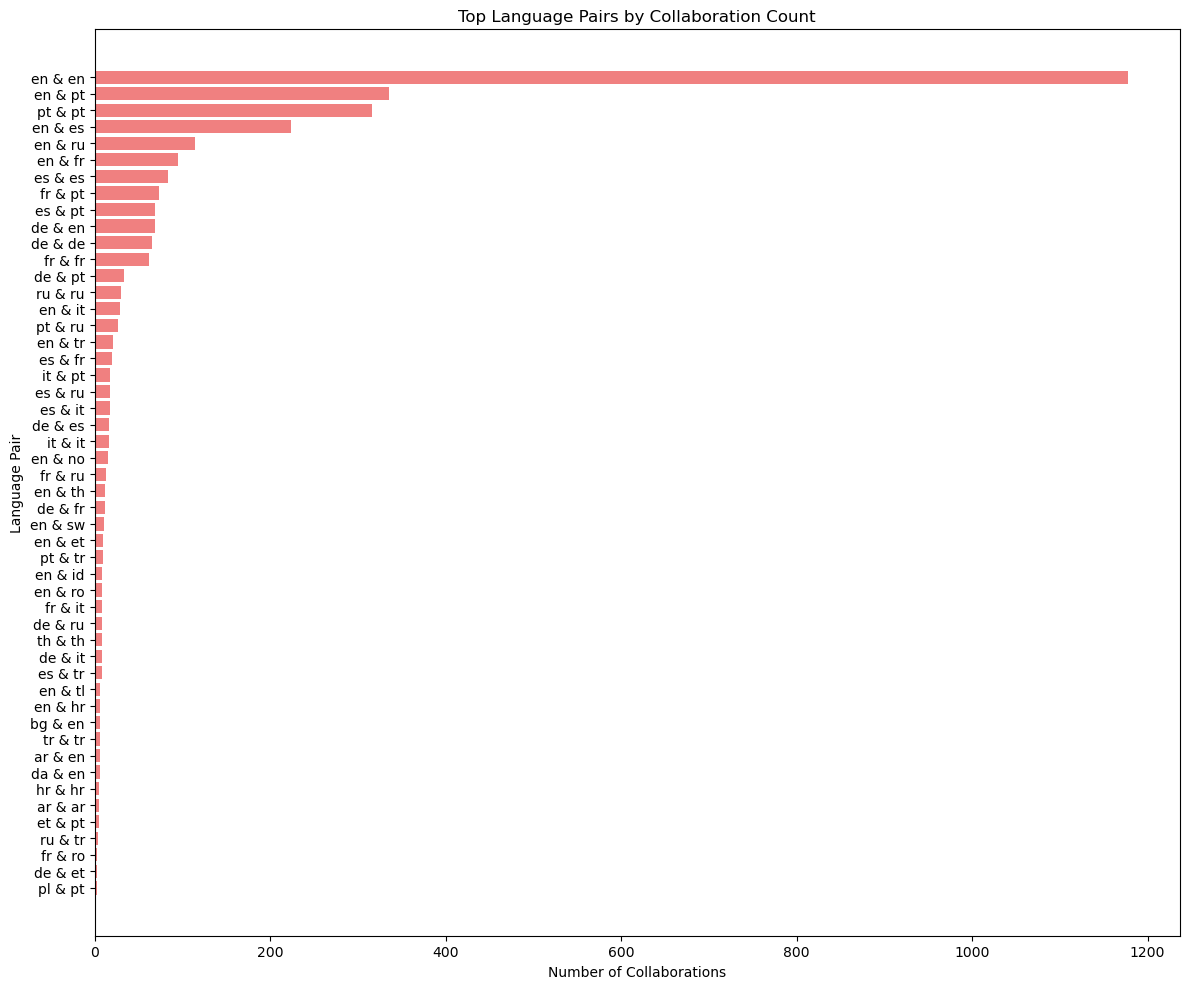

In [11]:
import matplotlib.pyplot as plt

# Sort and prepare data
top_lang_pairs = sorted(lang_pair_counts.items(), key=lambda x: -x[1])[:50]
pairs = [f"{pair[0]} & {pair[1]}" for pair, _ in top_lang_pairs]
counts = [count for _, count in top_lang_pairs]

# Plot
plt.figure(figsize=(12, 10))
plt.barh(pairs, counts, color='lightcoral')
plt.xlabel("Number of Collaborations")
plt.ylabel("Language Pair")
plt.title("Top Language Pairs by Collaboration Count")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


In [31]:
intra_cat_same_lang = 0
intra_cat_diff_lang = 0
inter_cat_same_lang = 0
inter_cat_diff_lang = 0

for _, row in df.iterrows():
    cat_from = row['from_category']
    cat_to = row['to_category']
    lang_from = row['from_lang']
    lang_to = row['to_lang']

    if pd.notnull(cat_from) and pd.notnull(cat_to):
        if cat_from == cat_to:
            if lang_from == lang_to:
                intra_cat_same_lang += 1
            else:
                intra_cat_diff_lang += 1
        else:
            if lang_from == lang_to:
                inter_cat_same_lang += 1
            else:
                inter_cat_diff_lang += 1

print("Intra-category same language:", intra_cat_same_lang)
print("Intra-category different language:", intra_cat_diff_lang)
print("Inter-category same language:", inter_cat_same_lang)
print("Inter-category different language:", inter_cat_diff_lang)


Intra-category same language: 878
Intra-category different language: 826
Inter-category same language: 904
Inter-category different language: 867


In [32]:
intra_topic_same_lang = 0
intra_topic_diff_lang = 0
inter_topic_same_lang = 0
inter_topic_diff_lang = 0

for _, row in df.iterrows():
    topic_from = row['from_topic']
    topic_to = row['to_topic']
    lang_from = row['from_lang']
    lang_to = row['to_lang']

    if pd.notnull(topic_from) and pd.notnull(topic_to):
        if topic_from == topic_to:
            if lang_from == lang_to:
                intra_topic_same_lang += 1
            else:
                intra_topic_diff_lang += 1
        else:
            if lang_from == lang_to:
                inter_topic_same_lang += 1
            else:
                inter_topic_diff_lang += 1

print("Intra-topic same language:", intra_topic_same_lang)
print("Intra-topic different language:", intra_topic_diff_lang)
print("Inter-topic same language:", inter_topic_same_lang)
print("Inter-topic different language:", inter_topic_diff_lang)


Intra-topic same language: 766
Intra-topic different language: 518
Inter-topic same language: 919
Inter-topic different language: 1094


In [33]:

# Add edges and store node attributes
for _, row in df.iterrows():
    src = row['from']
    tgt = row['to']
    G.add_node(src, category=row['from_category'], topic=row['from_topic'], network=row['from_network'], popularity=row['from_popularity'])
    G.add_node(tgt, category=row['to_category'], topic=row['to_topic'], network=row['to_network'], popularity=row['to_popularity'])
    G.add_edge(src, tgt, weight=row['weight'])

In [34]:
# Centralities
deg_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G, max_iter=500)

# Helper function to summarize top nodes
def summarize_top_nodes(centrality_dict, top_n=5, name="Centrality"):
    top = sorted(centrality_dict.items(), key=lambda x: -x[1])[:top_n]
    print(f"\nTop {top_n} nodes by {name}:")
    for node, score in top:
        print(f"Node: {node}, {name}: {score:.4f}, Category: {G.nodes[node].get('category')}, Topic: {G.nodes[node].get('topic')}")

summarize_top_nodes(deg_centrality, name="Degree")
summarize_top_nodes(betweenness, name="Betweenness")
summarize_top_nodes(closeness, name="Closeness")
summarize_top_nodes(eigenvector, name="Eigenvector")



Top 5 nodes by Degree:
Node: UC-Tvz0FJd6xRvVDw_4dc_GQ, Degree: 0.0188, Category: Entertainment, Topic: Strategy video game
Node: UCbTRgghKvt-I_V8CUtCPyrA, Degree: 0.0130, Category: Entertainment, Topic: Gaming
Node: UCzIzWHfn7wsS_VK0vQHV8Ew, Degree: 0.0130, Category: Gaming, Topic: Sports game
Node: UCAcziR0Lap_NIgQcwH7G29A, Degree: 0.0127, Category: Gaming, Topic: Strategy video game
Node: UCZjCiuXIP9ydZ4E6lxq1rIw, Degree: 0.0116, Category: Gaming, Topic: Action game

Top 5 nodes by Betweenness:
Node: UCm4WlDrdOOSbht-NKQ0uTeg, Betweenness: 0.0041, Category: Gaming, Topic: Action game
Node: UCU9GikSzhZjywuyYwmNCJ7A, Betweenness: 0.0025, Category: Gaming, Topic: Gaming
Node: UCogPo673-wysiFSt9P8_PXg, Betweenness: 0.0023, Category: Gaming, Topic: Gaming
Node: UCzIzWHfn7wsS_VK0vQHV8Ew, Betweenness: 0.0017, Category: Gaming, Topic: Sports game
Node: UC_Ufar-P7FwrYAyznzm96bA, Betweenness: 0.0016, Category: Gaming, Topic: Action game

Top 5 nodes by Closeness:
Node: UCPtLtJEoVSzd-zMlZaluxEA

In [35]:
from collections import defaultdict

# Group nodes by category
category_nodes = defaultdict(list)
for node in G.nodes():
    cat = G.nodes[node].get('category')
    if cat:
        category_nodes[cat].append(node)

# Centrality per category subgraph
for cat, nodes_in_cat in category_nodes.items():
    subG = G.subgraph(nodes_in_cat)
    print(f"\n--- Category: {cat} ---")
    summarize_top_nodes(nx.degree_centrality(subG), name=f"{cat} - Degree")
    summarize_top_nodes(nx.betweenness_centrality(subG), name=f"{cat} - Betweenness")
    summarize_top_nodes(nx.closeness_centrality(subG), name=f"{cat} - Closeness")



--- Category: Gaming ---

Top 5 nodes by Gaming - Degree:
Node: UCzIzWHfn7wsS_VK0vQHV8Ew, Gaming - Degree: 0.0543, Category: Gaming, Topic: Sports game
Node: UCAcziR0Lap_NIgQcwH7G29A, Gaming - Degree: 0.0517, Category: Gaming, Topic: Strategy video game
Node: UCZjCiuXIP9ydZ4E6lxq1rIw, Gaming - Degree: 0.0479, Category: Gaming, Topic: Action game
Node: UCm4WlDrdOOSbht-NKQ0uTeg, Gaming - Degree: 0.0479, Category: Gaming, Topic: Action game
Node: UC-iNzkiXFbRr_l-lq9MVy7w, Gaming - Degree: 0.0427, Category: Gaming, Topic: Gaming

Top 5 nodes by Gaming - Betweenness:
Node: UCm4WlDrdOOSbht-NKQ0uTeg, Gaming - Betweenness: 0.0210, Category: Gaming, Topic: Action game
Node: UCU9GikSzhZjywuyYwmNCJ7A, Gaming - Betweenness: 0.0158, Category: Gaming, Topic: Gaming
Node: UC_Ufar-P7FwrYAyznzm96bA, Gaming - Betweenness: 0.0141, Category: Gaming, Topic: Action game
Node: UCogPo673-wysiFSt9P8_PXg, Gaming - Betweenness: 0.0135, Category: Gaming, Topic: Gaming
Node: UCq-9OD1pdQQ7e-ma1C_Iz9g, Gaming - Bet

In [37]:
from collections import defaultdict

# Create a mapping from each node to the category-pairs it helps bridge
node_to_category_pairs = defaultdict(set)

for (cu, cv), edges in category_pairs.items():
    for u, v in edges:
        node_to_category_pairs[u].add((cu, cv))
        node_to_category_pairs[v].add((cu, cv))

# Get top 5 bridge nodes by inter-category betweenness
top_bridge_nodes = sorted(bridge_btw.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop Bridging Nodes Across Categories:")
for node, score in top_bridge_nodes:
    category = G.nodes[node].get('category')
    topic = G.nodes[node].get('topic')
    lang = G.nodes[node].get('lang')
    cat_pairs = node_to_category_pairs[node]
    
    print(f"Node: {node}")
    print(f"  Betweenness: {score:.4f}")
    print(f"  Category: {category}, Topic: {topic}, Lang: {lang}")
    print(f"  Bridges Categories: {', '.join([f'{a} ↔ {b}' for a, b in cat_pairs])}")
    print("-" * 50)



Top Bridging Nodes Across Categories:
Node: UCm4WlDrdOOSbht-NKQ0uTeg
  Betweenness: 0.0041
  Category: Gaming, Topic: Action game, Lang: en
  Bridges Categories: Gaming ↔ Entertainment, Entertainment ↔ Gaming, Education ↔ Gaming
--------------------------------------------------
Node: UCU9GikSzhZjywuyYwmNCJ7A
  Betweenness: 0.0025
  Category: Gaming, Topic: Gaming, Lang: en
  Bridges Categories: Gaming ↔ Education, Gaming ↔ Film & Animation
--------------------------------------------------
Node: UCogPo673-wysiFSt9P8_PXg
  Betweenness: 0.0023
  Category: Gaming, Topic: Gaming, Lang: tr
  Bridges Categories: Entertainment ↔ Gaming, Gaming ↔ Science & Technology, Gaming ↔ People & Blogs
--------------------------------------------------
Node: UCzIzWHfn7wsS_VK0vQHV8Ew
  Betweenness: 0.0017
  Category: Gaming, Topic: Sports game, Lang: it
  Bridges Categories: Gaming ↔ Entertainment, Gaming ↔ Sports, Entertainment ↔ Gaming, Gaming ↔ People & Blogs
-----------------------------------------

In [13]:
old_df = pd.read_csv("df_collabs.txt", sep="\t")
list_columns = ['from_cluster', 'to_cluster', 'videos']

for col in list_columns:
    old_df[col] = old_df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
old_df
old_df = old_df.rename(columns={'from': 'channelID'})
old_df

,Unnamed: 0,cluster,channelID,from_category,from_cluster,from_network,from_popularity,from_topic,to,to_category,to_cluster,to_network,to_popularity,to_topic,videos,weight
0,0,220,UCq6VFHwMzcMXbuKyG7SQYIg,Gaming,"[220, 11097]",Maker Studios,4,Action game,UCmA-0j6DRVQWo4skl8Otkiw,Entertainment,"[2251, 2981, 2982, 7678]",Maker Studios,4,NaN,[khyg5YJlLPI],1
1,1,11097,UCq6VFHwMzcMXbuKyG7SQYIg,Gaming,"[220, 11097]",Maker Studios,4,Action game,UCCYHZKyLdUnT7BsGfCQgQ-Q,Entertainment,"[7586, 7587, 10333]",Maker Studios,2,Gaming,[qP8HTuEu7BY],1
2,2,5556,UClpEE-Led9ZK0GJQKvU--3Q,Entertainment,"[5556, 5884, 7050]",Maker Studios,2,Football,UCIKF1msqN7lW9gplsifOPkQ,Entertainment,[12627],BroadbandTV,3,Music,[On4GE5hAU8s],1
3,3,5556,UClpEE-Led9ZK0GJQKvU--3Q,Entertainment,"[5556, 5884, 7050]",Maker Studios,2,Football,UCcLLDqqgjHoFaNkNdIrf_FA,Gaming,"[4139, 8817, 8818, 11763, 12363]",OmniaMediaCo,3,Football,[hAvpa3iyrsM],1
4,4,5556,UClpEE-Led9ZK0GJQKvU--3Q,Entertainment,"[5556, 5884, 7050]",Maker Studios,2,Football,UC3M4u8_WwqY-2xDbJXxo5eQ,Gaming,"[7049, 11244]",OmniaMediaCo,3,Sports game,"[4cEkXTIcvH4, _kOwJy1fOuQ]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,3470,8020,UCGl-muGnQctGYX8D0I9RKmA,Entertainment,"[2461, 5601, 5732, 8020]",BroadbandTV,3,Lifestyle,UCXHczq_8PytR6mEJeUTTrqw,Gaming,[6591],NaN,3,Gaming,[feSQQRqQTss],1
3471,3471,8020,UCGl-muGnQctGYX8D0I9RKmA,Entertainment,"[2461, 5601, 5732, 8020]",BroadbandTV,3,Lifestyle,UCKZo4N0lVPccBkSiuyVh4yg,People & Blogs,"[3450, 3451, 8034, 8035]",NaN,4,Movies,[n6b1wkB-_PM],1
3472,3472,5601,UCGl-muGnQctGYX8D0I9RKmA,Entertainment,"[2461, 5601, 5732, 8020]",BroadbandTV,3,Lifestyle,UCtrjFP7i92_30uv6IehwE5Q,Entertainment,"[3631, 7370]",BroadbandTV,4,Lifestyle,[qf_bPWgK66Q],1
3473,3473,8020,UCGl-muGnQctGYX8D0I9RKmA,Entertainment,"[2461, 5601, 5732, 8020]",BroadbandTV,3,Lifestyle,UC4irjUYpgjMTg0Wq8WhVNYQ,Gaming,[12621],Maker Studios,2,Gaming,[eo2jgSl9Law],1


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load tab-separated data
df = pd.read_csv("df_channel_history_collabs.txt", sep="\t")

# Convert timestamp
df['crawlTimestamp'] = pd.to_datetime(df['crawlTimestamp'])

# Sort data
df = df.sort_values(by=['channelID', 'crawlTimestamp'])

# Fill missing gradients with 0 or interpolate
df['gradient'] = df['gradient'].fillna(0)
df['p_gradient'] = df['p_gradient'].fillna(0)
df['viewCount_gradient'] = df['viewCount_gradient'].fillna(0)
df['p_viewCount_gradient'] = df['p_viewCount_gradient'].fillna(0)

# Optional: Add dummy metadata (if not present)
# These can be loaded from another file or inferred
# df['category'] = ...
# df['lang'] = ...
# df['tier'] = df['subscriberCount'].apply(lambda x: 'Beginner' if x < 10000 else 'Intermediate' if x < 100000 else 'Major')
# Filter rows where collaboration happened
# collab_df = df[df['collab_window'] == 1]
collab_df = df
# Aggregate benefit during collabs
benefit_df = collab_df.groupby('channelID').agg({
    'gradient': 'sum',
    'viewCount_gradient': 'sum',
    'subscriberCount': 'max',
    'viewCount': 'max'
}).rename(columns={'gradient': 'sub_gain', 'viewCount_gradient': 'view_gain'}).reset_index()

# Optional: Join metadata (category, lang, tier)
# If already in df, merge or map
# metadata_cols = ['channelID', 'category', 'lang']
metadata_cols = ['channelID','from_category']
metadata = old_df[metadata_cols].drop_duplicates(subset=['channelID'])
benefit_df = benefit_df.merge(metadata, on='channelID', how='left')

# Creator Tier
benefit_df['tier'] = benefit_df['subscriberCount'].apply(lambda x: 'Beginner' if x < 10000 else 'Intermediate' if x < 100000 else 'Major')
benefit_df


,channelID,sub_gain,view_gain,subscriberCount,viewCount,from_category,tier
0,UC-4kjzuh4822B9yPSgpZQgA,490908.0,3.276896e+07,1725319,61440188.0,NaN,Major
1,UC-63s9JLCZqIDlhXK6VHb7w,267.0,3.210180e+05,27873,9155189.0,NaN,Intermediate
2,UC-A4oZF4AlOEdlyZWBCI0cQ,10135.0,8.716226e+06,1652754,346406755.0,Entertainment,Major
3,UC-CRXGRabkMD7x6V_Nk9F0A,2097.0,5.388710e+05,4949,1013518.0,Film & Animation,Beginner
4,UC-NINtNMPM75eaqh07RCy_Q,79388.0,5.843481e+07,929946,684511092.0,Education,Major
...,...,...,...,...,...,...,...
1594,UCzdX8HbZrbGRwBkikmvpAXw,201.0,1.669800e+04,2499,99104.0,People & Blogs,Beginner
1595,UCzk9QXKubo6NhJyqAiWAqKg,3214.0,6.319060e+05,28113,2097536.0,Comedy,Intermediate
1596,UCzo4OXE8JxogJHWJ2SypiNg,112817.0,1.204307e+07,368371,43480906.0,Entertainment,Major
1597,UCzpCc5n9hqiVC7HhPwcIKEg,148536.0,5.934827e+07,2937303,475114683.0,Entertainment,Major


In [15]:
# Top 10 by subscriber gain
top_channels = benefit_df.sort_values('sub_gain', ascending=False).head(10)
print("Top Benefiting Channels:")
print(top_channels[['channelID', 'sub_gain', 'view_gain', 'tier']])


Top Benefiting Channels:
                     channelID   sub_gain     view_gain   tier
105   UC3KQ5GWANYF8lChqjZpXsQw  3870940.0  3.245172e+08  Major
16    UC-lHJZR3Gqxm24_Vd_AJ5Yw  3192762.0  9.801586e+08  Major
819   UCV306eHqgo0LvBf3Mh36AHg  2568004.0  3.873255e+08  Major
953   UC_gV70G_Y51LTa3qhu8KiEA  2106027.0  1.978463e+08  Major
688   UCPHXtOVmjvbP9OJihsd7gCg  1768636.0  1.365308e+08  Major
345   UCD9PZYV5heAevh9vrsYmt1g  1719017.0  1.487463e+08  Major
1140  UChM5Ff2yVeIZ16EWiB081cg  1676941.0  3.554551e+08  Major
1058  UCdxi8d8qRsRyUi2ERYjYb-w  1531324.0  8.312598e+08  Major
1316  UCoTyVfIkM-hjz4JauDoVvog  1464718.0  2.937430e+08  Major
9     UC-SV8-bUJfXjrRMnp7F8Wzw  1454657.0  5.703314e+08  Major


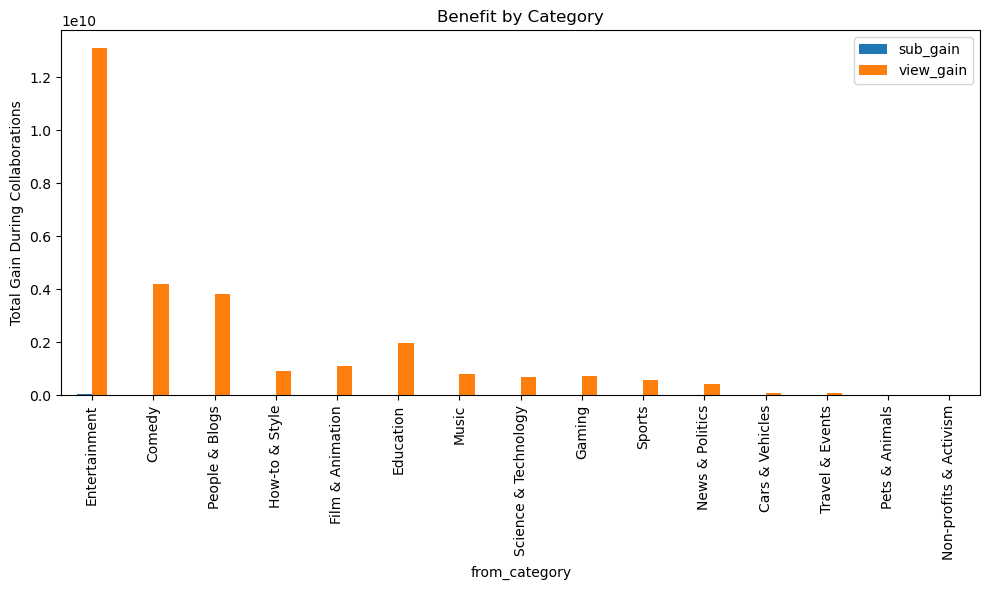

In [16]:
cat_benefit = benefit_df.groupby('from_category')[['sub_gain', 'view_gain']].sum().sort_values('sub_gain', ascending=False)
cat_benefit.plot(kind='bar', figsize=(10,6), title="Benefit by Category")
plt.ylabel("Total Gain During Collaborations")
plt.tight_layout()
plt.show()
# lang_benefit = benefit_df.groupby('lang')[['sub_gain', 'view_gain']].sum().sort_values('sub_gain', ascending=False)
# lang_benefit.plot(kind='bar', figsize=(10,6), title="Benefit by Language")
# plt.ylabel("Total Gain During Collaborations")
# plt.tight_layout()
# plt.show()
# tier_benefit = benefit_df.groupby('tier')[['sub_gain', 'view_gain']].sum().sort_values('sub_gain', ascending=False)
# tier_benefit.plot(kind='bar', figsize=(8,5), title="Benefit by Creator Tier")
# plt.ylabel("Total Gain During Collaborations")
# plt.tight_layout()
# plt.show()


In [65]:
def compute_net_gain(df):
    df_sorted = df.sort_values(by='crawlTimestamp')
    gains = []

    for channel, group in df_sorted.groupby('channelID'):
        group = group.reset_index(drop=True)

        # Get continuous blocks of collaboration
        collab_blocks = []
        in_block = False
        block = []

        for i, row in group.iterrows():
            if row['collab_window'] == 1:
                if not in_block:
                    block = [row]
                    in_block = True
                else:
                    block.append(row)
            else:
                if in_block:
                    collab_blocks.append(pd.DataFrame(block))
                    block = []
                    in_block = False
        if in_block and block:
            collab_blocks.append(pd.DataFrame(block))

        # For each collab block, compute net gain
        for block in collab_blocks:
            block = block.sort_values(by='crawlTimestamp')
            if len(block) >= 2:
                first = block.iloc[0]
                last = block.iloc[-1]
                gains.append({
                    'channelID': channel,
                    'subscriber_gain': last['subscriberCount'] - first['subscriberCount'],
                    'view_gain': last['viewCount'] - first['viewCount'],
                    'start': first['crawlTimestamp'],
                    'end': last['crawlTimestamp']
                })

    return pd.DataFrame(gains)
benefit_df = compute_net_gain(df)
benefit_df

""
